## Loading images and preprocessing

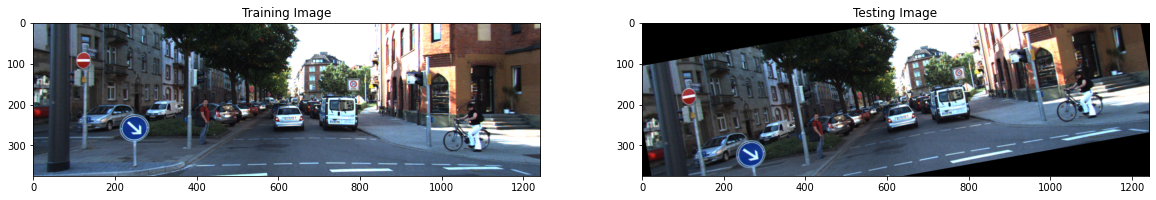

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

# Load the image
image1 = cv2.imread('01.png')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = training_image

num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 10, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

## SIFT

### Feature/Keypoint Detection

Mean number of keypoints detected:  3157.5


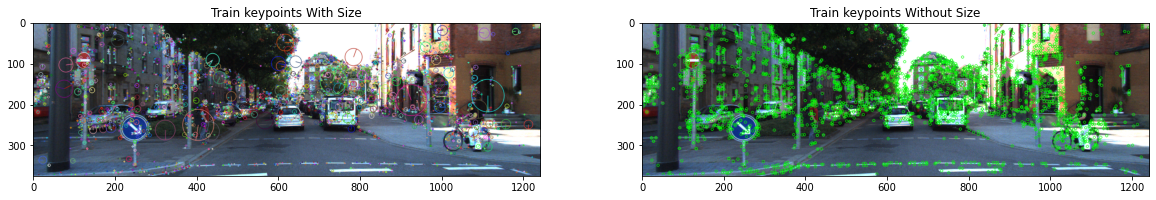

In [2]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the mean number of keypoints detected in both the images
print("Mean number of keypoints detected: ", (len(train_keypoints)+len(test_keypoints))/2)

In [9]:
train_keypoints[0]

<KeyPoint 0x7fe53032f660>

### Feature matching

In [10]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

random.shuffle(matches)

result = cv2.drawMatches(training_image, train_keypoints, test_image, test_keypoints, matches[:10], test_gray, flags = 2)

cv2.imshow('result',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
matches[0].queryIdx

530

### Extracting good matches using ratio test

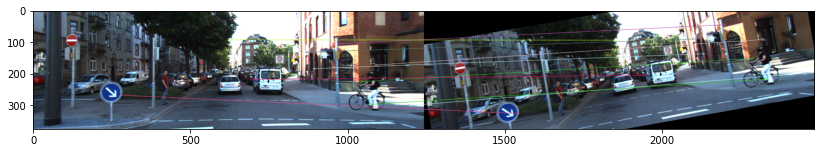


Number of Matching Keypoints Between The Training and Query Images:  2026


In [20]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(train_descriptor, test_descriptor,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

#Displaying top 10 matches
good = sorted(good, key = lambda x : x.distance)

img3 = cv2.drawMatches(training_image,train_keypoints,test_image,test_keypoints,good[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good))

## SURF

### Feature Detection

Mean number of keypoints detected:  3561.5


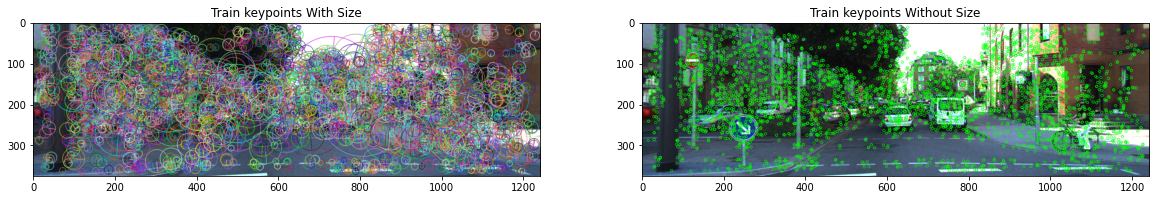

In [21]:
surf = cv2.xfeatures2d.SURF_create()

train_keypoints, train_descriptor = surf.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = surf.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the mean number of keypoints detected in both the images
print("Mean number of keypoints detected: ", (len(train_keypoints)+len(test_keypoints))/2)

### Feature matching

In [22]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

random.shuffle(matches)

result = cv2.drawMatches(training_image, train_keypoints, test_image, test_keypoints, matches[:10], test_gray, flags = 2)

cv2.imshow('result',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Extracting good matches using ratio test

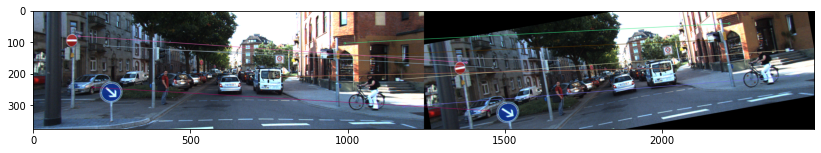


Number of Matching Keypoints Between The Training and Query Images:  1696


In [23]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(train_descriptor, test_descriptor,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

#Displaying top 10 matches
good = sorted(good, key = lambda x : x.distance)

img3 = cv2.drawMatches(training_image,train_keypoints,test_image,test_keypoints,good[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good))

## ORB

### Feature Detection

Mean number of keypoints detected:  500.0


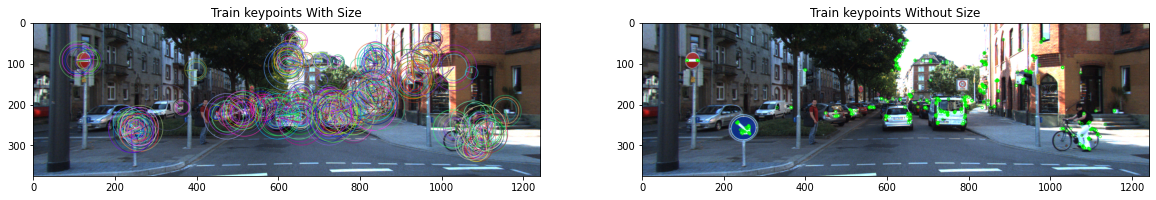

In [25]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the mean number of keypoints detected in both the images
print("Mean number of keypoints detected: ", (len(train_keypoints)+len(test_keypoints))/2)

### Feature Matching

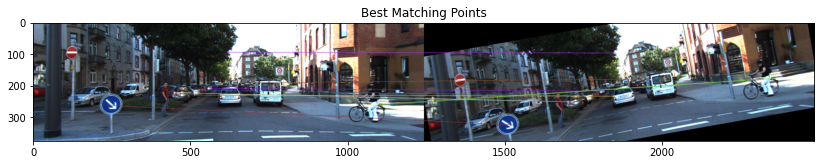


Number of Matching Keypoints Between The Training and Query Images:  372


In [26]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

random.shuffle(matches)

result = cv2.drawMatches(training_image, train_keypoints, test_image, test_keypoints, matches[:10], test_gray, flags = 2)

cv2.imshow('result',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Extracting good matches using ratio test

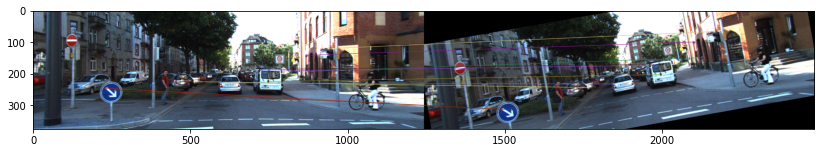


Number of Matching Keypoints Between The Training and Query Images:  338


In [30]:
# BFMatcher with default params
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(train_descriptor, test_descriptor,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

#Displaying top 10 matches
good = sorted(good, key = lambda x : x.distance)

img3 = cv2.drawMatches(training_image,train_keypoints,test_image,test_keypoints,good[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good))

## AKAZE

### Feature Detection

Mean number of keypoints detected:  1980.0


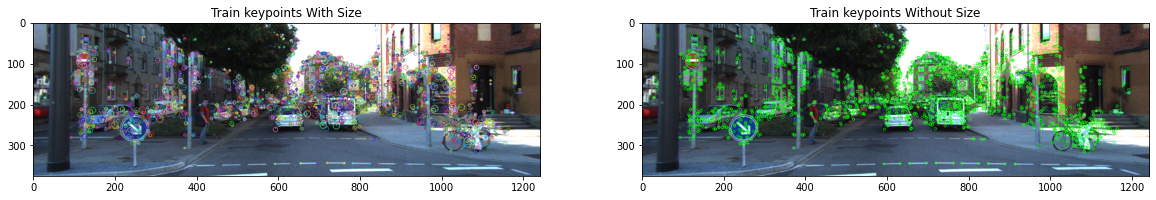

In [31]:
akaze = cv2.AKAZE_create()

train_keypoints, train_descriptor = akaze.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = akaze.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the mean number of keypoints detected in both the images
print("Mean number of keypoints detected: ", (len(train_keypoints)+len(test_keypoints))/2)

### Feature Matching

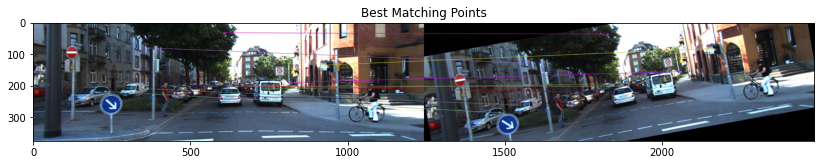


Number of Matching Keypoints Between The Training and Query Images:  1625


In [32]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

random.shuffle(matches)

result = cv2.drawMatches(training_image, train_keypoints, test_image, test_keypoints, matches[:10], test_gray, flags = 2)

cv2.imshow('result',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Extracting good matches using ratio test

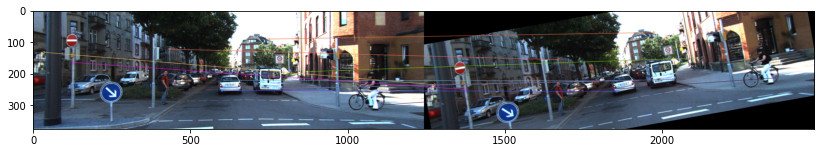


Number of Matching Keypoints Between The Training and Query Images:  1535


In [33]:
# BFMatcher with default params
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(train_descriptor, test_descriptor,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

#Displaying top 10 matches
good = sorted(good, key = lambda x : x.distance)

img3 = cv2.drawMatches(training_image,train_keypoints,test_image,test_keypoints,good[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good))

## BRISK

### Feature Detection

Mean number of keypoints detected:  4109.5


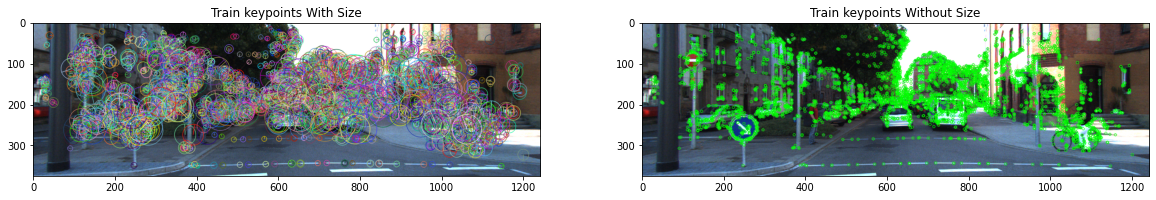

In [34]:
brisk = cv2.BRISK_create()

train_keypoints, train_descriptor = brisk.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = brisk.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the mean number of keypoints detected in both the images
print("Mean number of keypoints detected: ", (len(train_keypoints)+len(test_keypoints))/2)

### Feature Matching

In [35]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

random.shuffle(matches)

result = cv2.drawMatches(training_image, train_keypoints, test_image, test_keypoints, matches[:10], test_gray, flags = 2)

cv2.imshow('result',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Extracting good matches using ratio test

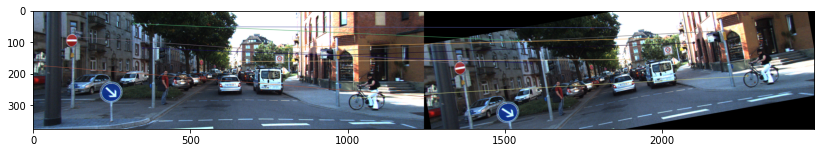


Number of Matching Keypoints Between The Training and Query Images:  2291


In [36]:
# BFMatcher with default params
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(train_descriptor, test_descriptor,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

#Displaying top 10 matches
good = sorted(good, key = lambda x : x.distance)

img3 = cv2.drawMatches(training_image,train_keypoints,test_image,test_keypoints,good[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good))

# Feature Tracking

In [2]:
    train_frame_no = 1
    test_frame_no = train_frame_no + 10
    train_frame = cv2.imread('data_outdoor/right_images_subset/scene_1.png')
    train_frame = cv2.resize(train_frame, None, fx=0.5, fy=0.5)

    #Creating relevant objects
    extractor = cv2.xfeatures2d.SIFT_create()
    bf = cv2.BFMatcher()

#LOOP HERE
    test_frame = cv2.imread('data_outdoor/right_images_subset/scene_' + str(test_frame_no) + '.png')
    test_frame = cv2.resize(test_frame, None, fx=0.5, fy=0.5)

    """
    if test_frame is None:
        break
    """

    # Convert the images to gray scale
    train_gray = cv2.cvtColor(train_frame, cv2.COLOR_BGR2GRAY)
    test_gray = cv2.cvtColor(test_frame, cv2.COLOR_BGR2GRAY)

    # FEATURE EXTRACTION 
    train_keypoints, train_descriptor = extractor.detectAndCompute(train_gray, None)
    test_keypoints, test_descriptor = extractor.detectAndCompute(test_gray, None)

    # FEATURE MATCHING
    matches = bf.knnMatch(train_descriptor, test_descriptor,k=2)

    # Extracting 'Good' matches using ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            good.append(m)
    
    """
    train_frame = test_frame
    train_frame_no = train_frame_no + 5
    test_frame_no = test_frame_no + 5
    """
    
    print(len(good))

760


In [3]:
good[425].trainIdx

1582

In [4]:
result = cv2.drawMatches(train_frame, train_keypoints, test_frame, test_keypoints, [good[425]],None,flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('match',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
    test_frame_2_no = test_frame_no + 10
    test_frame_2 = cv2.imread('data_outdoor/right_images_subset/scene_' + str(test_frame_2_no) + '.png')
    test_frame_2 = cv2.resize(test_frame_2, None, fx=0.5, fy=0.5)

    """
    if test_frame is None:
        break
    """
    # Convert the images to gray scale
    test_gray_2 = cv2.cvtColor(test_frame_2, cv2.COLOR_BGR2GRAY)

    # FEATURE EXTRACTION 
    test_keypoints_2, test_descriptor_2 = extractor.detectAndCompute(test_gray_2, None)

    # FEATURE MATCHING
    matches = bf.knnMatch(test_descriptor, test_descriptor_2,k=2)

    # Extracting 'Good' matches using ratio test
    good2 = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            good2.append(m)

    print(len(good2))

319


In [6]:
good2[0].queryIdx

5

In [10]:
index = random.randint(0,len(good)-1)
value = good[index].trainIdx
found = False

for match in good2:
    if match.queryIdx == value:
        matching_keypoint = match
        found = True
        break        

if not found:
    matching_keypoint = None
    print('No matching keypoint')

In [11]:
value

1570

In [12]:
index

406

In [13]:
matching_keypoint.queryIdx

1570

In [14]:
good[index].queryIdx

1174

In [15]:
matching_keypoint.trainIdx

2441

In [16]:
result = cv2.drawMatches(train_frame, train_keypoints, test_frame, test_keypoints, [good[index]],None,flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


cv2.imshow('match',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
result2 = cv2.drawMatches(test_frame, test_keypoints, test_frame_2, test_keypoints_2, [matching_keypoint],None,flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


cv2.imshow('matching_keypoint',result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Automating recording of results

In [1]:
import openpyxl

In [6]:
wb = openpyxl.load_workbook('Results for Experiments on Image features.xlsx')
worksheet = wb.active
worksheet.title = 'results'
wb.save('Results for Experiments on Image features.xlsx')